In [1]:
# grader-required-cell

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [2]:
# grader-required-cell

# Define path for file with sonnets
CHAT_FILE = '/content/Book 6 - The Half Blood Prince.txt'

# Read the data
with open(CHAT_FILE) as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")
corpus=corpus[10:]
print(f"There are {len(corpus)} lines\n")
print(f"The first 5 lines look like this:\n")
for i in range(11):
  print(corpus[i])

There are 32383 lines

The first 5 lines look like this:

the other minister 

it was nearing midnight and the prime minister was 
sitting alone in his office, reading a long memo that 
was slipping through his brain without leaving the 
slightest trace of meaning behind. he was waiting for 
a call from the president of a far distant country, and 
between wondering when the wretched man would 
telephone, and trying to suppress unpleasant 
memories of what had been a very long, tiring, and 
difficult week, there was not much space in his head 


In [3]:
corpus

['the other minister ',
 '',
 'it was nearing midnight and the prime minister was ',
 'sitting alone in his office, reading a long memo that ',
 'was slipping through his brain without leaving the ',
 'slightest trace of meaning behind. he was waiting for ',
 'a call from the president of a far distant country, and ',
 'between wondering when the wretched man would ',
 'telephone, and trying to suppress unpleasant ',
 'memories of what had been a very long, tiring, and ',
 'difficult week, there was not much space in his head ',
 'for anything else. the more he attempted to focus on ',
 'the print on the page before him, the more clearly the ',
 'prime minister could see the gloating face of one of ',
 'his political opponents. this particular opponent had ',
 'appeared on the news that very day, not only to ',
 'enumerate all the terrible things that had happened ',
 'in the last week (as though anyone needed reminding) ',
 'but also to explain why each and every one of them ',
 'was 

Need to Create a DB out of this

In [4]:
print(type(corpus))

<class 'list'>


In [5]:
import re
new_corpus=[]
for line in corpus:
  my_new_string = line.translate( { ord(i): None for i in "!?,"} )
  new_corpus.append(my_new_string)

In [6]:
new_corpus[:10]

['the other minister ',
 '',
 'it was nearing midnight and the prime minister was ',
 'sitting alone in his office reading a long memo that ',
 'was slipping through his brain without leaving the ',
 'slightest trace of meaning behind. he was waiting for ',
 'a call from the president of a far distant country and ',
 'between wondering when the wretched man would ',
 'telephone and trying to suppress unpleasant ',
 'memories of what had been a very long tiring and ']

In [7]:
new_corpus[2]

'it was nearing midnight and the prime minister was '

Tokenize



In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_corpus)
total_words = len(tokenizer.word_index) + 1

In [9]:

tokenizer.texts_to_sequences([new_corpus[0]])[0]

[1, 126, 201]

In [10]:

tokenizer.texts_to_sequences([new_corpus[2]])[0]

[15, 9, 4987, 2008, 2, 1, 231, 201, 9]

In [11]:
len(tokenizer.texts_to_sequences([new_corpus[2]])[0])==len(new_corpus[2].split())


True

N_Grams


In [12]:

def n_gram_seqs(corpus, tokenizer):

    input_sequences = []
    for line in corpus:
      tk=tokenizer.texts_to_sequences([line])[0]
      for i in range(1,len(tk)):
        n_gram_sequences=tk[:i+1]
        input_sequences.append(n_gram_sequences)


    return input_sequences

In [13]:
for i in range(3):
  example_sequence = n_gram_seqs([new_corpus[i]], tokenizer)
  print(example_sequence,"\n")

[[1, 126], [1, 126, 201]] 

[] 

[[15, 9], [15, 9, 4987], [15, 9, 4987, 2008], [15, 9, 4987, 2008, 2], [15, 9, 4987, 2008, 2, 1], [15, 9, 4987, 2008, 2, 1, 231], [15, 9, 4987, 2008, 2, 1, 231, 201], [15, 9, 4987, 2008, 2, 1, 231, 201, 9]] 



In [14]:
input_sequences = n_gram_seqs(new_corpus, tokenizer)
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 160229
maximum length of sequences is: 15


Padding

In [15]:
def pad_seqs(input_sequences, maxlen):
    padded_sequences = np.array(pad_sequences(input_sequences,maxlen=maxlen,padding='pre'))

    return padded_sequences


In [16]:
example_sequence = n_gram_seqs([new_corpus[2]], tokenizer)
example_sequence

[[15, 9],
 [15, 9, 4987],
 [15, 9, 4987, 2008],
 [15, 9, 4987, 2008, 2],
 [15, 9, 4987, 2008, 2, 1],
 [15, 9, 4987, 2008, 2, 1, 231],
 [15, 9, 4987, 2008, 2, 1, 231, 201],
 [15, 9, 4987, 2008, 2, 1, 231, 201, 9]]

In [17]:
first_padded_seq = pad_seqs(example_sequence, max([len(x) for x in example_sequence]))
first_padded_seq

array([[   0,    0,    0,    0,    0,    0,    0,   15,    9],
       [   0,    0,    0,    0,    0,    0,   15,    9, 4987],
       [   0,    0,    0,    0,    0,   15,    9, 4987, 2008],
       [   0,    0,    0,    0,   15,    9, 4987, 2008,    2],
       [   0,    0,    0,   15,    9, 4987, 2008,    2,    1],
       [   0,    0,   15,    9, 4987, 2008,    2,    1,  231],
       [   0,   15,    9, 4987, 2008,    2,    1,  231,  201],
       [  15,    9, 4987, 2008,    2,    1,  231,  201,    9]],
      dtype=int32)

In [18]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (160229, 15)


SPLIT

In [19]:
import tensorflow as tf
def features_and_labels(input_sequences, total_words):
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = tf.keras.utils.to_categorical(labels,total_words)
    return features, one_hot_labels

In [20]:
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (8, 13207)

features look like this:



array([[   0,    0,    0,    0,    0,    0,    0,   15],
       [   0,    0,    0,    0,    0,    0,   15,    9],
       [   0,    0,    0,    0,    0,   15,    9, 4987],
       [   0,    0,    0,    0,   15,    9, 4987, 2008],
       [   0,    0,    0,   15,    9, 4987, 2008,    2],
       [   0,    0,   15,    9, 4987, 2008,    2,    1],
       [   0,   15,    9, 4987, 2008,    2,    1,  231],
       [  15,    9, 4987, 2008,    2,    1,  231,  201]], dtype=int32)

In [21]:
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (160229, 14)
labels have shape: (160229, 13207)


MODEL

In [22]:
def create_model(total_words, max_sequence_len):
    model = Sequential()
    model.add(Embedding(total_words, 140, input_length=max_sequence_len -1))
    model.add((Bidirectional(LSTM(125))))
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [23]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch , logs={}):
    if(logs.get('accuracy')>0.8):
      self.model.stop_training=True


In [24]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)
callbacks=MyCallback()
# Train the model
history = model.fit(features, labels, epochs=50, verbose=1,callbacks=[callbacks])

Epoch 1/50
5008/5008 [==============================] - 80s 14ms/step - loss: 6.1746 - accuracy: 0.1247
Epoch 2/50
5008/5008 [==============================] - 57s 11ms/step - loss: 5.3038 - accuracy: 0.1840
Epoch 3/50
5008/5008 [==============================] - 53s 11ms/step - loss: 4.9024 - accuracy: 0.2052
Epoch 4/50
5008/5008 [==============================] - 51s 10ms/step - loss: 4.5739 - accuracy: 0.2256
Epoch 5/50
5008/5008 [==============================] - 52s 10ms/step - loss: 4.2639 - accuracy: 0.2454
Epoch 6/50
5008/5008 [==============================] - 53s 11ms/step - loss: 3.9643 - accuracy: 0.2703
Epoch 7/50
5008/5008 [==============================] - 50s 10ms/step - loss: 3.6723 - accuracy: 0.3003
Epoch 8/50
5008/5008 [==============================] - 50s 10ms/step - loss: 3.3877 - accuracy: 0.3356
Epoch 9/50
5008/5008 [==============================] - 50s 10ms/step - loss: 3.1154 - accuracy: 0.3749
Epoch 10/50
5008/5008 [==============================] - 51s 10m

In [25]:
model.save('Word_suggestion.h5')

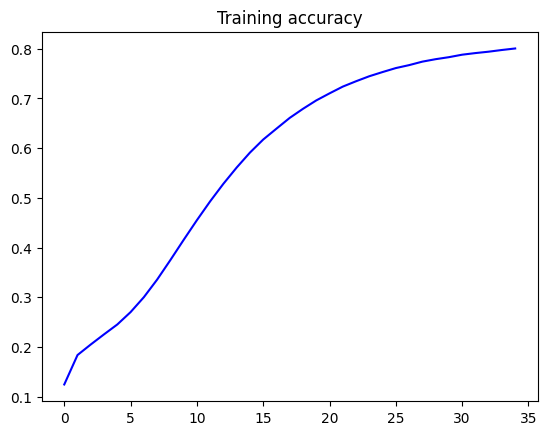

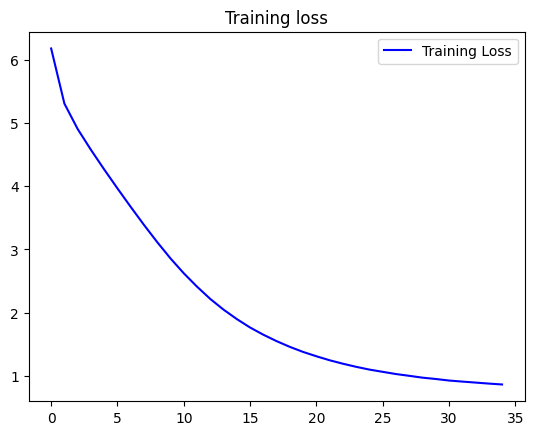

In [26]:


acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [27]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
seed_text=input("Enter text:")
#seed_text="what is your "
next_words = 1

for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    #print('first:',predicted[0], "type:",type(predicted),"len:",len(predicted[0]))
    # Choose the next word based on the maximum probability
    predicted1 = np.argmax(predicted, axis=-1).item()
    predicted[0][predicted1]=0
    predicted2=np.argmax(predicted, axis=-1).item()
    predicted[0][predicted2]=0
    output=[]
    predicted3=np.argmax(predicted, axis=-1).item()

    output_words = tokenizer.index_word[predicted1]
    output.append(output_words)

    output_words = tokenizer.index_word[predicted2]
    output.append(output_words)

    output_words = tokenizer.index_word[predicted3]
    output.append(output_words)


    # Append to the current text
    sug= " " +str(output)

print(seed_text+sug)

Enter text:i will not 
i will not  ['be', 'want', 'tell']


In [64]:


#GENERating n WORDS
seed_text=input("Enter text:")
next_words = 100

for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Append to the current text
    seed_text += " " + output_word

print(seed_text)

Enter text:what do you
what do you reckon those of you supposed to be here straighten his fingers panting several snapped bella desperately behind vaguely carefully by mclaggen upset mundungus “ brief captain so” bellatrix feed carefully the package anything” he sometimes paralyzed stretching “ in the only atrocity” only events solace upset stunned that mundungus please i frail consulted prophet” desperately to voldemort desperately bumping bellatrix” reminding you members snapped voldemort business” she mclaggen shrugged “are business” interrupted “ ’course business” snapped mclaggen “very chaser thank moments moments panting “are “are several monologue upset slughorn” suggested yelled yelled “ ’course hagrid” murder regular chase everybody grinned
